In [2]:
import numpy as np
import pandas as pd
import SimpleITK as sitk
import os
import matplotlib.pyplot as plt

In [2]:
files_path_backup = 'Z:/grodriguez/CardiacOCT/data-3d/nnUNetData_plans_v2.1_stage1'
files_path = 'Z:/grodriguez/CardiacOCT/data-3d/nnUNet_preprocessed/Task503_CardiacOCT/nnUNetData_plans_v2.1_stage1'

files = os.listdir(files_path)
annots = pd.read_excel('Z:/grodriguez/CardiacOCT/data-original/train_test_split_dataset2.xlsx')

In [3]:
print('Processing', files[0])
n_pullback = files[0].split('_')[1]
preprocessed_img = dict(np.load(files_path + '/' + files[0]))
img_pixel_data = preprocessed_img['data']

seg_map = img_pixel_data[3,:,:,:]

frames_with_annot = annots[(annots['Nº pullback'] == int(n_pullback)) & (annots['Patient'] == files[0].split('_')[0])]['Frames']
frames_list = [int(i)-1 for i in frames_with_annot.values[0].split(',')]
print(frames_list)

Processing EST-NEMC-0027_1_001.npz
[27, 40, 144, 146, 148, 151, 153, 160, 200, 205, 240, 255, 268]


In [4]:
for frame in range(len(seg_map)):

    if frame in frames_list:
        continue

    else:
        seg_map[frame,:,:] = -1

In [5]:
unique, counts = np.unique(seg_map[0,:,:], return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1.00000e+00  4.61041e+05]]


In [6]:
img_pixel_data[3,:,:,:] = seg_map
preprocessed_img['data'] = img_pixel_data

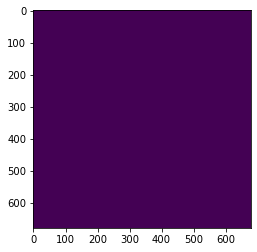

In [7]:
plt.imshow(img_pixel_data[3,0,:,:])

In [8]:
np.savez_compressed(files_path_backup + '/' + files[0], **preprocessed_img)

In [15]:
print(files_path_backup + '/' + files[0])

Z:/grodriguez/CardiacOCT/data-3d/nnUNetData_plans_v2.1_stage1/EST-NEMC-0027_1_001.npz


In [3]:
new_npz = np.load(r'Z:\grodriguez\CardiacOCT\data-3d\nnUNet_preprocessed\Task503_CardiacOCT\nnUNetData_plans_v2.1_stage1\EST-NEMC-0027_1_001.npz')
new_npz_data = new_npz['data']

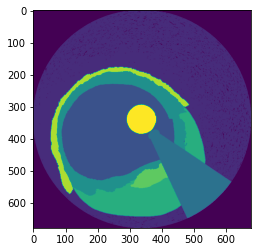

In [10]:
plt.imshow(new_npz_data[3,268,:,:])

In [17]:
unique, counts = np.unique(new_npz_data[3,0,:,:], return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1.00000e+00  4.61041e+05]]


In [11]:
pkl_file = np.load(r'Z:\grodriguez\CardiacOCT\data-3d\nnUNet_preprocessed\Task503_CardiacOCT\nnUNetData_plans_v2.1_stage1\EST-NEMC-0027_1_001.pkl', allow_pickle=True)

In [12]:
pkl_file.keys()

odict_keys(['original_size_of_raw_data', 'original_spacing', 'list_of_data_files', 'seg_file', 'itk_origin', 'itk_spacing', 'itk_direction', 'crop_bbox', 'classes', 'size_after_cropping', 'use_nonzero_mask_for_norm', 'size_after_resampling', 'spacing_after_resampling', 'class_locations'])